In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix 
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Conv2D,Flatten,GlobalAveragePooling2D,BatchNormalization,Dropout,MaxPooling2D

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
cifar10 = tf.keras.datasets.cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
X_train , X_test = X_train/255.0,X_test/255.0

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [10]:
K = len(set(y_train))
print(f"Number of classes {K}")

Number of classes 10


In [0]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32,(3,3),padding="same",activation="relu")(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3),padding="same",activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64,(3,3),padding="same",activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),padding="same",activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128,(3,3),padding="same",activation="relu")(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),padding="same",activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)

model = Model(i, x)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 

In [0]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [0]:
#train without augmentation
hist = model.fit(X_train,y_train,
                 validation_data=(X_test,y_test),epochs=50)

In [19]:
#data augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
train_generator = data_generator.flow(X_train,y_train,batch_size)
steps_per_epoch = X_train.shape[0]//batch_size


hist = model.fit(train_generator,validation_data=(X_test,y_test),steps_per_epoch=steps_per_epoch,epochs=10)

Epoch 1/10
1562/1562 [==============================] - 434s 278ms/step - loss: 0.6207 - accuracy: 0.7942 - val_loss: 0.5454 - val_accuracy: 0.8164
Epoch 2/10
1562/1562 [==============================] - 440s 282ms/step - loss: 0.5307 - accuracy: 0.8181 - val_loss: 0.5972 - val_accuracy: 0.8074
Epoch 3/10
1562/1562 [==============================] - 445s 285ms/step - loss: 0.4893 - accuracy: 0.8344 - val_loss: 0.5078 - val_accuracy: 0.8313
Epoch 4/10
1562/1562 [==============================] - 445s 285ms/step - loss: 0.4590 - accuracy: 0.8451 - val_loss: 0.4884 - val_accuracy: 0.8350
Epoch 5/10
1562/1562 [==============================] - 448s 287ms/step - loss: 0.4371 - accuracy: 0.8517 - val_loss: 0.5193 - val_accuracy: 0.8254
Epoch 6/10
1562/1562 [==============================] - 453s 290ms/step - loss: 0.4149 - accuracy: 0.8577 - val_loss: 0.4584 - val_accuracy: 0.8505
Epoch 7/10
1562/1562 [==============================] - 455s 291ms/step - loss: 0.3986 - accuracy: 0.8635 - val_

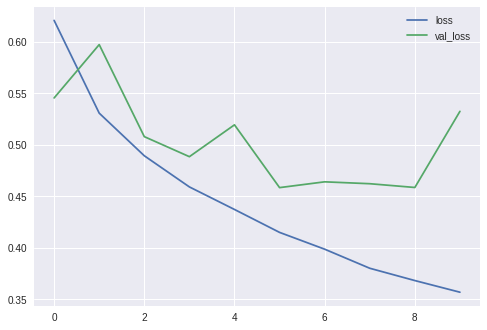

In [21]:
#model loss
plt.style.use('seaborn')
plt.plot(hist.history['loss'],label="loss")
plt.plot(hist.history['val_loss'],label="val_loss")
plt.legend()
plt.show()

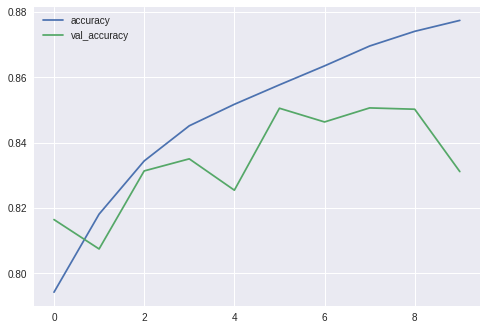

In [22]:
#model accuracy
plt.style.use('seaborn')
plt.plot(hist.history['accuracy'],label="accuracy")
plt.plot(hist.history['val_accuracy'],label="val_accuracy")
plt.legend()
plt.show()

In [0]:
y_pred = model.predict(X_test).argmax(axis=1)

In [30]:
y_pred.shape

(10000,)

In [0]:
cm = confusion_matrix(y_test,y_pred)

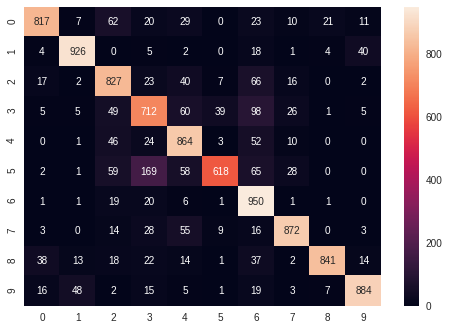

In [35]:
sns.heatmap(cm,fmt="d",annot=True)